In [18]:
# Import Dependencies
import requests
import pandas as pd
from pprint import pprint
from datetime import datetime as dt
import sqlalchemy
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Make an API call to the database 
url = "https://data.sfgov.org/resource/ubvf-ztfx.json"
response = requests.get(url)
data = response.json()

In [20]:
type(data)

list

In [21]:
len(data)

1000

In [22]:
pprint(data[10])

{':@computed_region_26cr_cadq': '9',
 ':@computed_region_6qbp_sg9q': '55',
 ':@computed_region_ajp5_b2md': '26',
 ':@computed_region_jwn9_ihcz': '55',
 ':@computed_region_qgnn_b9vv': '2',
 'accident_year': '2020',
 'beat_number': '3C11D',
 'case_id_pkey': '200325422',
 'cnn_intrsctn_fkey': '23555000',
 'cnn_sgmt_fkey': '191101',
 'collision_date': '2020-05-29T00:00:00.000',
 'collision_datetime': '2020-05-29T16:52:00.000',
 'collision_severity': 'Injury (Other Visible)',
 'collision_time': '16:52:00',
 'control_device': 'Functioning',
 'data_as_of': '2020-06-04T00:00:00.000',
 'data_loaded_at': '2023-08-05T03:30:22.025',
 'data_updated_at': '2023-04-06T00:00:00.000',
 'day_of_week': 'Friday',
 'direction': 'South',
 'distance': '228',
 'dph_col_grp': 'AA',
 'dph_col_grp_description': 'Vehicle(s) Only Involved',
 'geocode_location': 'CITY STREET',
 'geocode_source': 'SFPD-INTERIM DB',
 'intersection': 'Midblock > 20ft',
 'juris': '3801',
 'lighting': 'Daylight',
 'month': 'May',
 'mviw'

In [23]:
# convert to data frame
df = pd.DataFrame(data)
df.head()

,unique_id,cnn_intrsctn_fkey,case_id_pkey,tb_latitude,tb_longitude,geocode_source,geocode_location,collision_datetime,collision_date,collision_time,...,data_as_of,data_updated_at,data_loaded_at,:@computed_region_jwn9_ihcz,:@computed_region_6qbp_sg9q,:@computed_region_qgnn_b9vv,:@computed_region_26cr_cadq,:@computed_region_ajp5_b2md,party_at_fault,cnn_sgmt_fkey
0,15414,23926000,151003670,37.7778565368195,-122.406436335616,SFPD-CROSSROADS,CITY STREET,2015-11-18T09:04:00.000,2015-11-18T00:00:00.000,09:04:00,...,2015-11-18T00:00:00.000,2023-04-26T00:00:00.000,2023-08-05T03:30:15.753,32,32,1,10,34,NaN,NaN
1,52640,23969000,200212108,37.7544528719,-122.408342784,SFPD-INTERIM DB,CITY STREET,2020-03-28T14:35:00.000,2020-03-28T00:00:00.000,14:35:00,...,2020-04-02T00:00:00.000,2023-04-26T00:00:00.000,2023-08-05T03:30:19.984,53,53,3,2,20,1,NaN
2,36577,22495000,140836694,37.7140400777839,-122.461135168136,SFPD-CROSSROADS,CITY STREET,2014-10-04T13:25:00.000,2014-10-04T00:00:00.000,13:25:00,...,2014-10-04T00:00:00.000,2023-04-26T00:00:00.000,2023-08-05T03:30:20.014,81,81,10,1,24,NaN,5408000
3,27582,24726000,160732947,37.7916270504119,-122.402515531378,SFPD-CROSSROADS,CITY STREET,2016-09-08T14:00:00.000,2016-09-08T00:00:00.000,14:00:00,...,2016-09-08T00:00:00.000,2023-04-26T00:00:00.000,2023-08-05T03:30:20.045,108,108,6,3,8,NaN,9299000
4,14911,23811000,180566685,37.7798561436,-122.394007535,SFPD-INTERIM DB,CITY STREET,2018-07-30T11:25:00.000,2018-07-30T00:00:00.000,11:25:00,...,2018-10-22T00:00:00.000,2023-04-26T00:00:00.000,2023-08-05T03:30:21.847,31,31,1,10,8,NaN,179000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   unique_id                    1000 non-null   object
 1   cnn_intrsctn_fkey            1000 non-null   object
 2   case_id_pkey                 1000 non-null   object
 3   tb_latitude                  980 non-null    object
 4   tb_longitude                 980 non-null    object
 5   geocode_source               1000 non-null   object
 6   geocode_location             1000 non-null   object
 7   collision_datetime           1000 non-null   object
 8   collision_date               1000 non-null   object
 9   collision_time               996 non-null    object
 10  accident_year                1000 non-null   object
 11  month                        1000 non-null   object
 12  day_of_week                  1000 non-null   object
 13  time_cat                     996 n

In [25]:
# drop any rows that do not have a collision time
df = df[df['collision_time'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   unique_id                    996 non-null    object
 1   cnn_intrsctn_fkey            996 non-null    object
 2   case_id_pkey                 996 non-null    object
 3   tb_latitude                  977 non-null    object
 4   tb_longitude                 977 non-null    object
 5   geocode_source               996 non-null    object
 6   geocode_location             996 non-null    object
 7   collision_datetime           996 non-null    object
 8   collision_date               996 non-null    object
 9   collision_time               996 non-null    object
 10  accident_year                996 non-null    object
 11  month                        996 non-null    object
 12  day_of_week                  996 non-null    object
 13  time_cat                     996 no

In [26]:
# drop any rows that do not have a lat and lon
df = df[df['tb_latitude'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 977 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   unique_id                    977 non-null    object
 1   cnn_intrsctn_fkey            977 non-null    object
 2   case_id_pkey                 977 non-null    object
 3   tb_latitude                  977 non-null    object
 4   tb_longitude                 977 non-null    object
 5   geocode_source               977 non-null    object
 6   geocode_location             977 non-null    object
 7   collision_datetime           977 non-null    object
 8   collision_date               977 non-null    object
 9   collision_time               977 non-null    object
 10  accident_year                977 non-null    object
 11  month                        977 non-null    object
 12  day_of_week                  977 non-null    object
 13  time_cat                     977 no

In [27]:
# convert collision date to datetime data type
df['collision_datetime'] = pd.to_datetime(df['collision_date'])
df.head()

,unique_id,cnn_intrsctn_fkey,case_id_pkey,tb_latitude,tb_longitude,geocode_source,geocode_location,collision_datetime,collision_date,collision_time,...,data_as_of,data_updated_at,data_loaded_at,:@computed_region_jwn9_ihcz,:@computed_region_6qbp_sg9q,:@computed_region_qgnn_b9vv,:@computed_region_26cr_cadq,:@computed_region_ajp5_b2md,party_at_fault,cnn_sgmt_fkey
0,15414,23926000,151003670,37.7778565368195,-122.406436335616,SFPD-CROSSROADS,CITY STREET,2015-11-18,2015-11-18T00:00:00.000,09:04:00,...,2015-11-18T00:00:00.000,2023-04-26T00:00:00.000,2023-08-05T03:30:15.753,32,32,1,10,34,NaN,NaN
1,52640,23969000,200212108,37.7544528719,-122.408342784,SFPD-INTERIM DB,CITY STREET,2020-03-28,2020-03-28T00:00:00.000,14:35:00,...,2020-04-02T00:00:00.000,2023-04-26T00:00:00.000,2023-08-05T03:30:19.984,53,53,3,2,20,1,NaN
2,36577,22495000,140836694,37.7140400777839,-122.461135168136,SFPD-CROSSROADS,CITY STREET,2014-10-04,2014-10-04T00:00:00.000,13:25:00,...,2014-10-04T00:00:00.000,2023-04-26T00:00:00.000,2023-08-05T03:30:20.014,81,81,10,1,24,NaN,5408000
3,27582,24726000,160732947,37.7916270504119,-122.402515531378,SFPD-CROSSROADS,CITY STREET,2016-09-08,2016-09-08T00:00:00.000,14:00:00,...,2016-09-08T00:00:00.000,2023-04-26T00:00:00.000,2023-08-05T03:30:20.045,108,108,6,3,8,NaN,9299000
4,14911,23811000,180566685,37.7798561436,-122.394007535,SFPD-INTERIM DB,CITY STREET,2018-07-30,2018-07-30T00:00:00.000,11:25:00,...,2018-10-22T00:00:00.000,2023-04-26T00:00:00.000,2023-08-05T03:30:21.847,31,31,1,10,8,NaN,179000


In [28]:
# convert collision time to datetime data type keep only hour
df['collision_time'] = pd.to_datetime(df['collision_time'], format='%H:%M:%S').dt.hour
df.head()

,unique_id,cnn_intrsctn_fkey,case_id_pkey,tb_latitude,tb_longitude,geocode_source,geocode_location,collision_datetime,collision_date,collision_time,...,data_as_of,data_updated_at,data_loaded_at,:@computed_region_jwn9_ihcz,:@computed_region_6qbp_sg9q,:@computed_region_qgnn_b9vv,:@computed_region_26cr_cadq,:@computed_region_ajp5_b2md,party_at_fault,cnn_sgmt_fkey
0,15414,23926000,151003670,37.7778565368195,-122.406436335616,SFPD-CROSSROADS,CITY STREET,2015-11-18,2015-11-18T00:00:00.000,9,...,2015-11-18T00:00:00.000,2023-04-26T00:00:00.000,2023-08-05T03:30:15.753,32,32,1,10,34,NaN,NaN
1,52640,23969000,200212108,37.7544528719,-122.408342784,SFPD-INTERIM DB,CITY STREET,2020-03-28,2020-03-28T00:00:00.000,14,...,2020-04-02T00:00:00.000,2023-04-26T00:00:00.000,2023-08-05T03:30:19.984,53,53,3,2,20,1,NaN
2,36577,22495000,140836694,37.7140400777839,-122.461135168136,SFPD-CROSSROADS,CITY STREET,2014-10-04,2014-10-04T00:00:00.000,13,...,2014-10-04T00:00:00.000,2023-04-26T00:00:00.000,2023-08-05T03:30:20.014,81,81,10,1,24,NaN,5408000
3,27582,24726000,160732947,37.7916270504119,-122.402515531378,SFPD-CROSSROADS,CITY STREET,2016-09-08,2016-09-08T00:00:00.000,14,...,2016-09-08T00:00:00.000,2023-04-26T00:00:00.000,2023-08-05T03:30:20.045,108,108,6,3,8,NaN,9299000
4,14911,23811000,180566685,37.7798561436,-122.394007535,SFPD-INTERIM DB,CITY STREET,2018-07-30,2018-07-30T00:00:00.000,11,...,2018-10-22T00:00:00.000,2023-04-26T00:00:00.000,2023-08-05T03:30:21.847,31,31,1,10,8,NaN,179000


In [29]:
# convert injury number columns to integer types as well as year column 
integer_col = ['accident_year','number_killed', 'number_injured']
df[integer_col]=df[integer_col].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 977 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   unique_id                    977 non-null    object        
 1   cnn_intrsctn_fkey            977 non-null    object        
 2   case_id_pkey                 977 non-null    object        
 3   tb_latitude                  977 non-null    object        
 4   tb_longitude                 977 non-null    object        
 5   geocode_source               977 non-null    object        
 6   geocode_location             977 non-null    object        
 7   collision_datetime           977 non-null    datetime64[ns]
 8   collision_date               977 non-null    object        
 9   collision_time               977 non-null    int64         
 10  accident_year                977 non-null    int32         
 11  month                        977 non-null    

In [30]:
# convert lat and long to float data type
df[['tb_latitude','tb_longitude']] = df[['tb_latitude','tb_longitude']].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 977 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   unique_id                    977 non-null    object        
 1   cnn_intrsctn_fkey            977 non-null    object        
 2   case_id_pkey                 977 non-null    object        
 3   tb_latitude                  977 non-null    float64       
 4   tb_longitude                 977 non-null    float64       
 5   geocode_source               977 non-null    object        
 6   geocode_location             977 non-null    object        
 7   collision_datetime           977 non-null    datetime64[ns]
 8   collision_date               977 non-null    object        
 9   collision_time               977 non-null    int64         
 10  accident_year                977 non-null    int32         
 11  month                        977 non-null    

In [31]:
# bin rows based on hour the incident occured
df_binned = df
bins = [0,4,8,12,16,20,24]
labels = ["12AM - 4AM","4AM - 8AM","8AM - 12PM","12PM - 4PM","4PM - 8PM","8PM - 12AM"]
df_binned['period_of_day'] = pd.cut(x = df_binned['collision_time'], bins = bins, labels = labels)
df_binned.head()

,unique_id,cnn_intrsctn_fkey,case_id_pkey,tb_latitude,tb_longitude,geocode_source,geocode_location,collision_datetime,collision_date,collision_time,...,data_updated_at,data_loaded_at,:@computed_region_jwn9_ihcz,:@computed_region_6qbp_sg9q,:@computed_region_qgnn_b9vv,:@computed_region_26cr_cadq,:@computed_region_ajp5_b2md,party_at_fault,cnn_sgmt_fkey,period_of_day
0,15414,23926000,151003670,37.777857,-122.406436,SFPD-CROSSROADS,CITY STREET,2015-11-18,2015-11-18T00:00:00.000,9,...,2023-04-26T00:00:00.000,2023-08-05T03:30:15.753,32,32,1,10,34,NaN,NaN,8AM - 12PM
1,52640,23969000,200212108,37.754453,-122.408343,SFPD-INTERIM DB,CITY STREET,2020-03-28,2020-03-28T00:00:00.000,14,...,2023-04-26T00:00:00.000,2023-08-05T03:30:19.984,53,53,3,2,20,1,NaN,12PM - 4PM
2,36577,22495000,140836694,37.714040,-122.461135,SFPD-CROSSROADS,CITY STREET,2014-10-04,2014-10-04T00:00:00.000,13,...,2023-04-26T00:00:00.000,2023-08-05T03:30:20.014,81,81,10,1,24,NaN,5408000,12PM - 4PM
3,27582,24726000,160732947,37.791627,-122.402516,SFPD-CROSSROADS,CITY STREET,2016-09-08,2016-09-08T00:00:00.000,14,...,2023-04-26T00:00:00.000,2023-08-05T03:30:20.045,108,108,6,3,8,NaN,9299000,12PM - 4PM
4,14911,23811000,180566685,37.779856,-122.394008,SFPD-INTERIM DB,CITY STREET,2018-07-30,2018-07-30T00:00:00.000,11,...,2023-04-26T00:00:00.000,2023-08-05T03:30:21.847,31,31,1,10,8,NaN,179000,8AM - 12PM


In [32]:
#create final dataframe with only the columns we want to include in our analysis

df_final = df_binned[['unique_id', 'tb_latitude', 'tb_longitude', 'collision_datetime', 'collision_time', 'accident_year', 'month', 'day_of_week', 'weather_1',
                       'collision_severity', 'type_of_collision', 'ped_action', 'control_device', 'number_killed', 'number_injured']]
df_final.head()

,unique_id,tb_latitude,tb_longitude,collision_datetime,collision_time,accident_year,month,day_of_week,weather_1,collision_severity,type_of_collision,ped_action,control_device,number_killed,number_injured
0,15414,37.777857,-122.406436,2015-11-18,9,2015,November,Wednesday,Clear,Injury (Complaint of Pain),Other,No Pedestrian Involved,None,0,1
1,52640,37.754453,-122.408343,2020-03-28,14,2020,March,Saturday,Cloudy,Injury (Other Visible),Broadside,No Pedestrian Involved,Functioning,0,1
2,36577,37.714040,-122.461135,2014-10-04,13,2014,October,Saturday,Clear,Injury (Complaint of Pain),Vehicle/Pedestrian,Not in Road,None,0,1
3,27582,37.791627,-122.402516,2016-09-08,14,2016,September,Thursday,Not Stated,Injury (Other Visible),Not Stated,Not Stated,Not Stated,0,1
4,14911,37.779856,-122.394008,2018-07-30,11,2018,July,Monday,Clear,Injury (Severe),Not Stated,No Pedestrian Involved,None,0,1


In [47]:
df_final['collision_datetime'] = pd.to_datetime(df_final['collision_datetime'])

# Define the time periods
before_covid = (df_final['collision_datetime'] >= '2018-01-01') & (df_final['collision_datetime'] <= '2019-12-31')
during_covid = (df_final['collision_datetime'] >= '2020-01-01') & (df_final['collision_datetime'] <= '2021-12-31')
after_covid = (df_final['collision_datetime'] >= '2022-01-01') & (df_final['collision_datetime'] <= '2023-12-31')

# Filter data based on time periods
before_covid_data = df_final[before_covid]
during_covid_data = df_final[during_covid]
after_covid_data = df_final[after_covid]

# Calculate the total number killed and injured for each time period
before_covid_stats = before_covid_data[['number_killed', 'number_injured']].sum()
during_covid_stats = during_covid_data[['number_killed', 'number_injured']].sum()
after_covid_stats = after_covid_data[['number_killed', 'number_injured']].sum()

# Plotting
time_periods = ['Before COVID', 'During COVID', 'After COVID']
killed_values = [before_covid_stats['number_killed'], during_covid_stats['number_killed'], after_covid_stats['number_killed']]
injured_values = [before_covid_stats['number_injured'], during_covid_stats['number_injured'], after_covid_stats['number_injured']]

C:\Users\julia\AppData\Local\Temp\ipykernel_17832\1263011077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['collision_datetime'] = pd.to_datetime(df_final['collision_datetime'])


In [49]:
before_covid_stats.head()

number_killed      0
number_injured    95
dtype: int64

In [52]:
during_covid_data.head()

,unique_id,tb_latitude,tb_longitude,collision_datetime,collision_time,accident_year,month,day_of_week,weather_1,collision_severity,type_of_collision,ped_action,control_device,number_killed,number_injured
1,52640,37.754453,-122.408343,2020-03-28,14,2020,March,Saturday,Cloudy,Injury (Other Visible),Broadside,No Pedestrian Involved,Functioning,0,1
5,53158,37.803308,-122.414537,2020-05-08,19,2020,May,Friday,Clear,Injury (Complaint of Pain),Other,No Pedestrian Involved,None,0,1
8,52914,37.807073,-122.417261,2020-05-17,12,2020,May,Sunday,Other,Injury (Complaint of Pain),Broadside,No Pedestrian Involved,Not Stated,0,1
10,52962,37.757336,-122.388164,2020-05-29,16,2020,May,Friday,Clear,Injury (Other Visible),Not Stated,No Pedestrian Involved,Functioning,0,1
17,53726,37.779567,-122.398060,2020-07-08,8,2020,July,Wednesday,Clear,Injury (Complaint of Pain),Hit Object,No Pedestrian Involved,Functioning,0,1


In [51]:
after_covid_stats.head()

number_killed      2
number_injured    40
dtype: int64

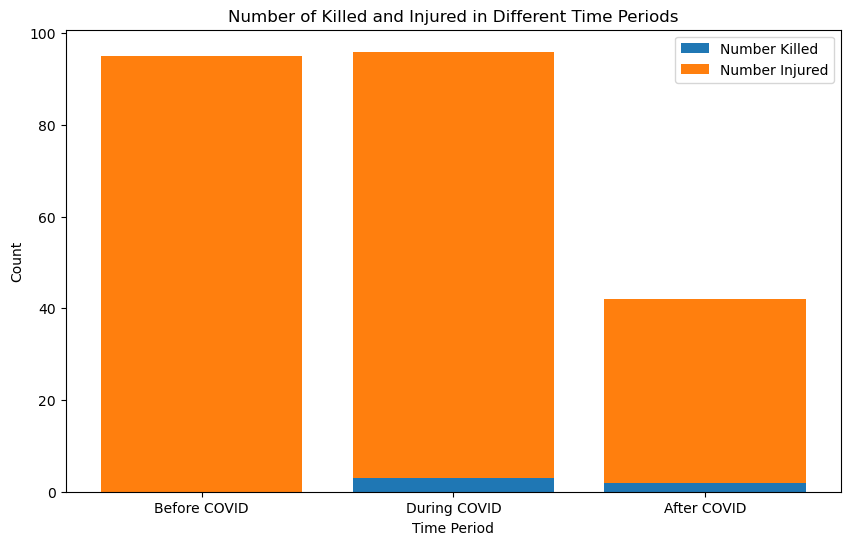

In [53]:
plt.figure(figsize=(10, 6))
plt.bar(time_periods, killed_values, label='Number Killed')
plt.bar(time_periods, injured_values, bottom=killed_values, label='Number Injured')
plt.xlabel('Time Period')
plt.ylabel('Count')
plt.title('Number of Killed and Injured in Different Time Periods')
plt.legend()
plt.show()

In [34]:
# create an engine to access sql database file
engine = create_engine("sqlite:///traffic_db.sqlite")

# Convert the dataframe to a "data" table in the db.sqlite database
df_final.to_sql('traffic_db', if_exists='replace', index=False, con=engine)

977